In [6]:
import pandas as pd
import geopandas as gpd

In [48]:
covid_data_dir_0 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_0.csv'
covid_data_dir_1 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_1.csv'
covid_data_dir_2 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_2.csv'
covid_data_dir_3 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_3.csv'

bnd_data_dir = r'data/processed/merge.shp'

In [49]:
df_covid_0 = pd.read_csv(covid_data_dir_0)
df_covid_1 = pd.read_csv(covid_data_dir_1)
df_covid_2 = pd.read_csv(covid_data_dir_2)
df_covid_3 = pd.read_csv(covid_data_dir_3)

df_bnd = gpd.read_file(bnd_data_dir)

/tmp/ipykernel_13513/3910334582.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_0 = pd.read_csv(covid_data_dir_0)
/tmp/ipykernel_13513/3910334582.py:4: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_3 = pd.read_csv(covid_data_dir_3)


In [51]:
df_covid = pd.concat([df_covid_0,df_covid_1,df_covid_2,df_covid_3],axis=0)

<AxesSubplot:xlabel='DateRepConf'>

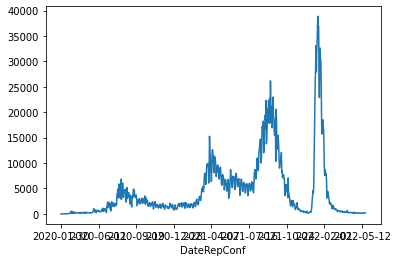

In [52]:
df_covid.groupby('DateRepConf').CaseCode.count().plot()

In [63]:
# subset to delta surge
df_covid['DateRepConf'] = pd.to_datetime(df_covid.DateRepConf)

df_covid.loc[df_covid.DateRepConf>=pd.to_datetime('2021-08-01')]

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
580516,C5533092,24.0,20 to 24,MALE,2021-07-30,2021-07-30,2021-08-01,NaN,NaN,RECOVERED,...,NCR,CITY OF MANILA,PH133914000,BARANGAY 763,PH133914019,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
580517,C77531585,21.0,20 to 24,FEMALE,NaN,NaN,2021-08-01,NaN,NaN,RECOVERED,...,MISAMIS ORIENTAL,TAGOLOAN,PH104324000,POBLACION,PH104324006,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
580518,C61319231,23.0,20 to 24,FEMALE,2021-07-27,2021-07-28,2021-08-01,NaN,NaN,RECOVERED,...,NCR,CITY OF NAVOTAS,PH137503000,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
580519,C79452509,55.0,55 to 59,MALE,2021-07-30,2021-07-30,2021-08-01,NaN,2021-08-11,RECOVERED,...,NCR,CITY OF MAKATI,PH137602000,COMEMBO,PH137602004,RECOVERED,NO,NaN,NaN,NaN
580520,C63078351,57.0,55 to 59,FEMALE,2021-07-29,2021-07-30,2021-08-01,NaN,NaN,RECOVERED,...,MISAMIS ORIENTAL,CAGAYAN DE ORO CITY (CAPITAL),PH104305000,BUGO,PH104305041,RECOVERED,NO,2021-07-26,NO,"Removal Type is ""Recovered"", but no Recovered ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688746,C82192821,28.0,25 to 29,MALE,2022-05-18,2022-05-18,2022-05-21,NaN,NaN,NaN,...,NCR,CITY OF MAKATI,PH137602000,POST PROPER NORTHSIDE,PH137602021,ASYMPTOMATIC,NO,NaN,NaN,NaN
688747,C22823450,62.0,60 to 64,FEMALE,2022-05-18,2022-05-19,2022-05-21,NaN,NaN,NaN,...,PAMPANGA,ANGELES CITY,PH035401000,CUTUD,PH035401008,ASYMPTOMATIC,NO,NaN,NO,NaN
688748,C91457454,39.0,35 to 39,FEMALE,2022-05-16,2022-05-16,2022-05-21,NaN,NaN,NaN,...,CAVITE,IMUS CITY,PH042109000,BAYAN LUMA VIII,PH042109047,MILD,NO,2022-05-14,NO,NaN
688749,C65095735,57.0,55 to 59,MALE,2022-05-17,2022-05-19,2022-05-21,NaN,NaN,NaN,...,ORIENTAL MINDORO,NAUJAN,PH175208000,MULAWIN,PH175208037,MILD,NO,2022-05-10,NaN,NaN
